#### Lib Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import algorythm as alg
import math
from sklearn.cluster import KMeans


In [2]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/ПК2_18.02-25.02.csv', header=0, sep =',')

In [3]:
data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['temperatureSdv'] > 1]
#data1 = data1.loc[data1['temperatureSdv'] < 2000]
data1 = data1.loc[data1['temperatureMax'] > 1]
data1 = data1.loc[data1['temperatureMin'] > 1]
data1 = data1.loc[data1['temperatureAvgExt'] > 1]
data1 = data1.loc[data1['temperatureSdvExt'] > 1]
data1 = data1.loc[data1['id']  > 1]
#data1 = data1.loc[data1['distance']  > 1]
data1 = data1.loc[data1['temperatureAvg'] < 3500]
#data1 = data1.loc[data1['temperatureAvg'] > 2400]
#data1 = data1.loc[data1['mappingError'] < 0.1]
#data1 = data1.loc[data1['temperatureSdv'] < 500]

Text(0.5, 1.0, 'Зависимость распознанных событий id от времени')

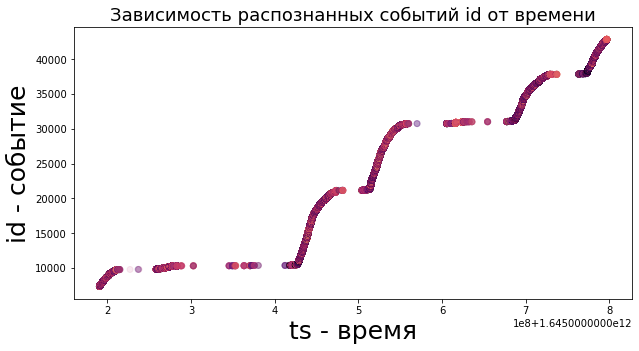

In [4]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['id'], c = data1['temperatureAvg'], cmap = "magma", alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('id - событие', fontsize = 25, color = 'black')
plot.set_title('Зависимость распознанных событий id от времени',  fontsize = 18, color = 'black')

Text(0.5, 1.0, 'Зависимость температуры распознанных событий от времени')

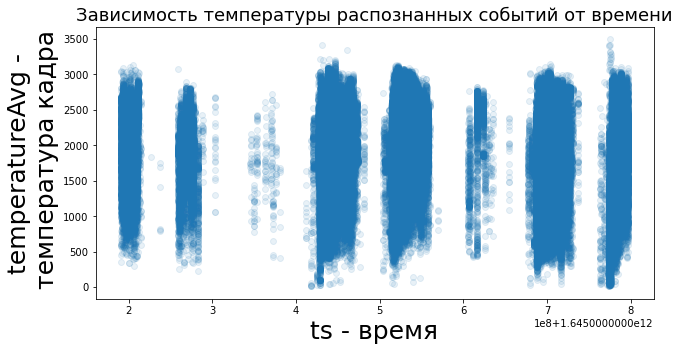

In [5]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')

plot.set_title('Зависимость температуры распознанных событий от времени',  fontsize = 18, color = 'black')

In [ ]:
plot.scatter(data1['ts'], data1['temperatureAvg'], alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')

plot.set_title('Зависимость температуры распознанных событий от времени',  fontsize = 18, color = 'black')

In [6]:
data1.describe()

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
count,243728.000000,243728.000000,2.437280e+05,243728.000000,243728.000000,243728.000000,243728.000000,2.437280e+05,243555.000000,243728.000000,243728.000000,243728.000000,243728.000000,243728.000000,2.437280e+05,2.437280e+05,2.437280e+05,2.437280e+05,243728.000000,243728.0
mean,25844.615297,630.038527,1.645552e+12,0.461006,0.581778,0.039242,0.091068,1.645552e+12,0.453168,0.616912,0.053252,0.091715,2016.909049,325.463403,2.273364e+03,6.170283e+03,9.326238e+05,5.179125e+02,0.011334,-1.0
std,10238.718885,196.472627,1.615312e+08,0.175617,0.122273,0.013295,0.031238,1.615312e+08,0.227567,0.119644,0.017075,0.030296,589.387959,509.069223,4.381092e+05,1.744245e+06,4.596286e+08,1.090184e+05,0.002956,0.0
min,7336.000000,0.000000,1.645190e+12,0.003125,0.298148,0.010417,0.010046,1.645190e+12,0.000000,0.000000,0.000000,0.000000,7.800000,1.037492,4.000000e+00,1.200000e+01,7.812963e+01,1.282424e+00,0.003263,-1.0
25%,16541.000000,502.326200,1.645444e+12,0.305208,0.496296,0.031250,0.070370,1.645444e+12,0.250000,0.534722,0.041667,0.072917,1599.820000,171.817475,8.730000e+02,2.383000e+03,1.349704e+03,1.344019e+02,0.011525,-1.0
50%,26800.000000,617.143100,1.645528e+12,0.512500,0.570370,0.036458,0.085185,1.645528e+12,0.520833,0.607639,0.049479,0.086806,2110.889000,284.732150,1.419000e+03,2.735000e+03,1.623348e+03,2.538909e+02,0.011525,-1.0
75%,34700.250000,720.000500,1.645700e+12,0.589583,0.674074,0.044792,0.105555,1.645700e+12,0.619792,0.708333,0.059896,0.104167,2485.426750,440.754525,1.874000e+03,2.975000e+03,1.868943e+03,3.974631e+02,0.013455,-1.0
max,42864.000000,2160.003000,1.645797e+12,0.810640,0.989954,0.236458,0.531482,1.645797e+12,0.861979,0.965278,0.309896,0.520833,3493.515000,205085.100000,2.162905e+08,8.611153e+08,2.269132e+11,5.382073e+07,0.109352,-1.0


In [7]:
unique = data1['id'].unique()
mean = []
for item in unique:
    mean += [data1.loc[data1['id'] == item]['id'].count()]

In [8]:
data_count = pd.DataFrame({'id': unique, 'count': mean})
data_count = data_count.sort_values(by=['count'])
data_count = data_count.reset_index(drop=True)
print(data_count['count'].describe())

count    26530.000000
mean         9.186883
std         23.329626
min          1.000000
25%          2.000000
50%          3.000000
75%          8.000000
max       1341.000000
Name: count, dtype: float64


Text(0.5, 0, 'Событие')

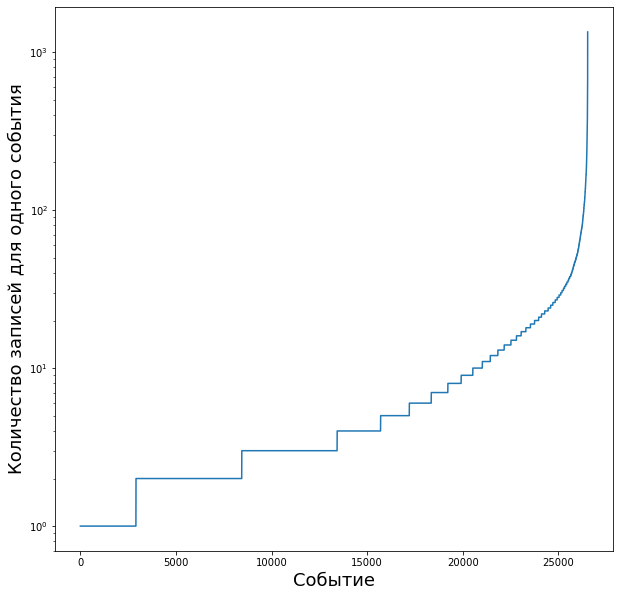

In [9]:
fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111)
plot.set_yscale('log')
plot.plot(data_count.index, data_count['count'], alpha=1)
plot.set_ylabel('Количество записей для одного события',  fontsize = 18, color = 'black')
plot.set_xlabel('Событие',  fontsize = 18, color = 'black')

In [10]:
model = f.Model(data1, 15)
model.filter(1)
data2 = model.df_all

In [11]:
clusters = alg.clusterise(data1,number_of_clusters=5)
clusters1 = alg.clusterise(data2,number_of_clusters=5)

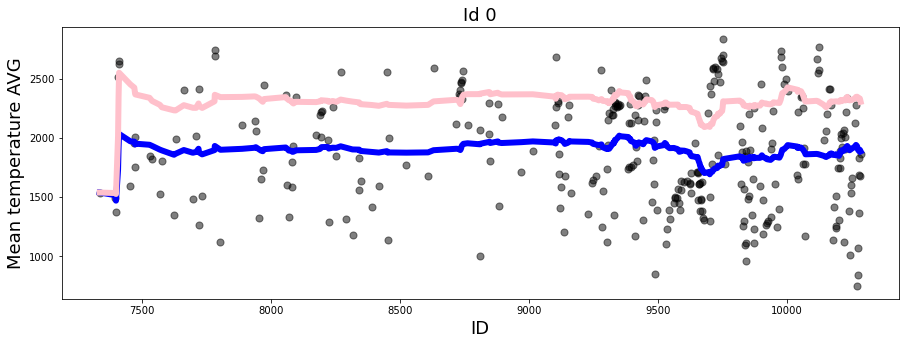

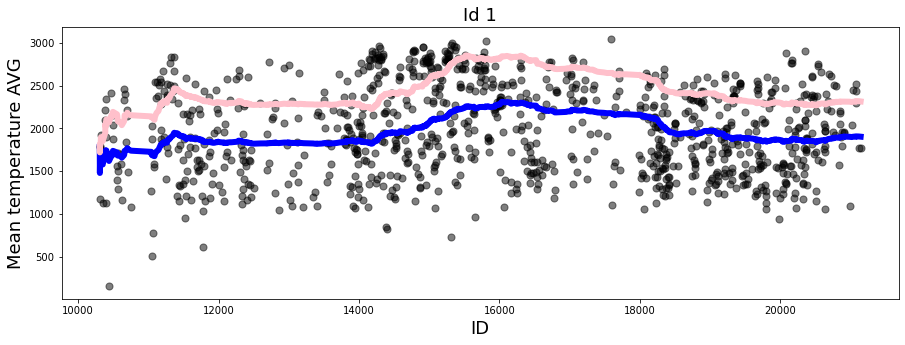

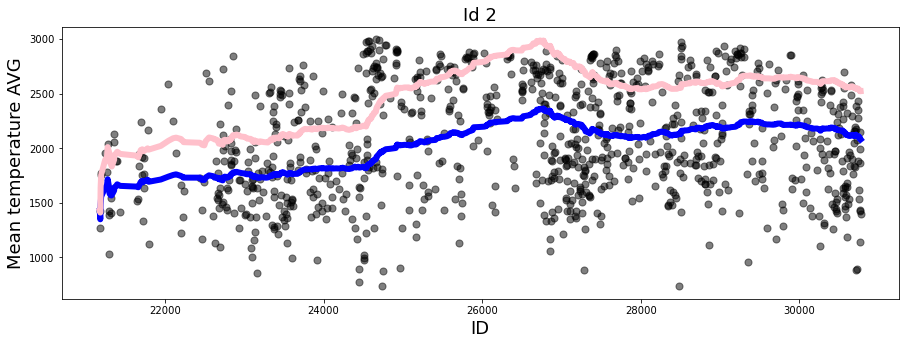

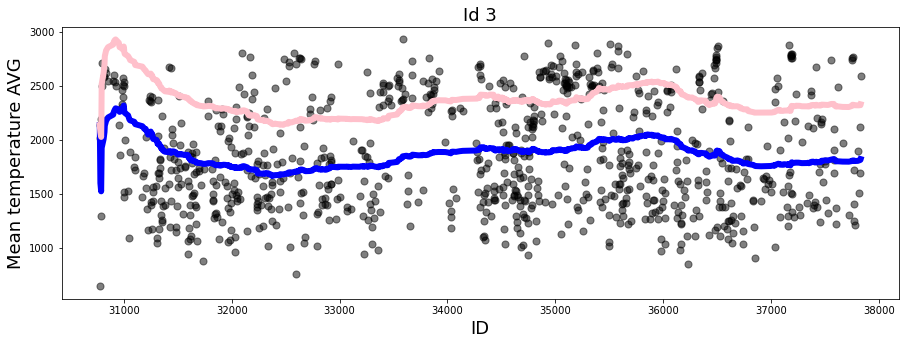

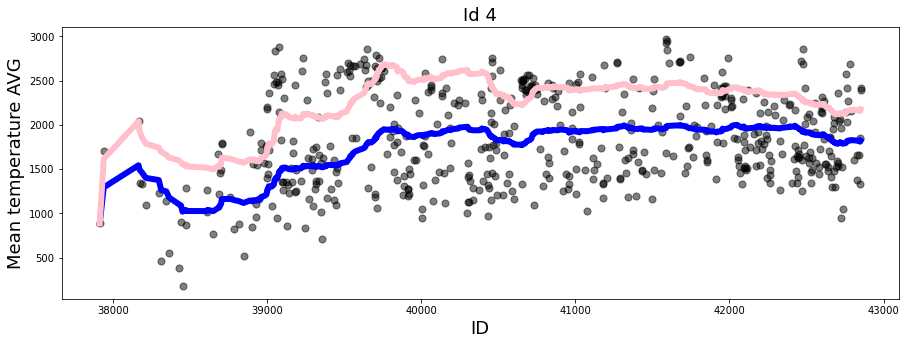

In [19]:
f.draw_clusters(clusters, clusters1, close_data_size_koef=5, print_points = True, main=False)

Text(0.5, 1.0, 'Кластеризация событий по времени')

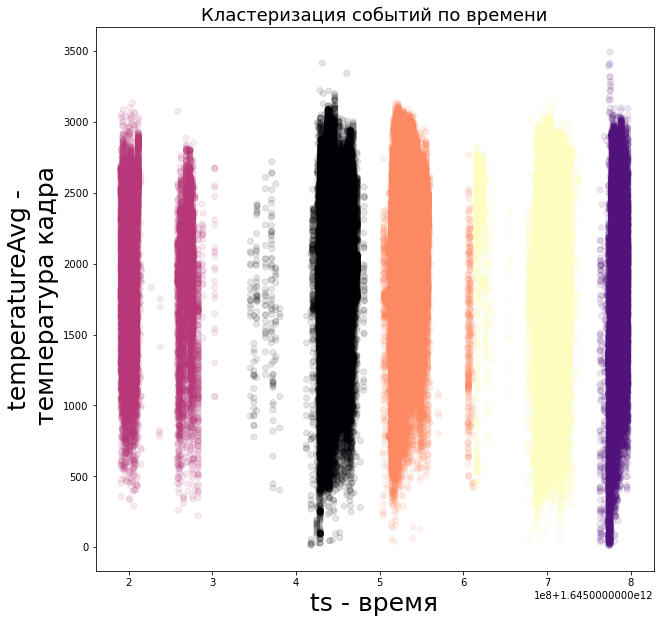

In [13]:
fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], c = data1['cluster'],alpha=0.1, cmap = "magma")
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')
plot.set_title('Кластеризация событий по времени',  fontsize = 18, color = 'black')

In [14]:
main_mean_list = f.mean_list(data1)
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 50, ratio = 0)
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 10000, ratio=0)
border = algo_set_avg + mean_set_avg

Text(0.5, 1.0, 'Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.')

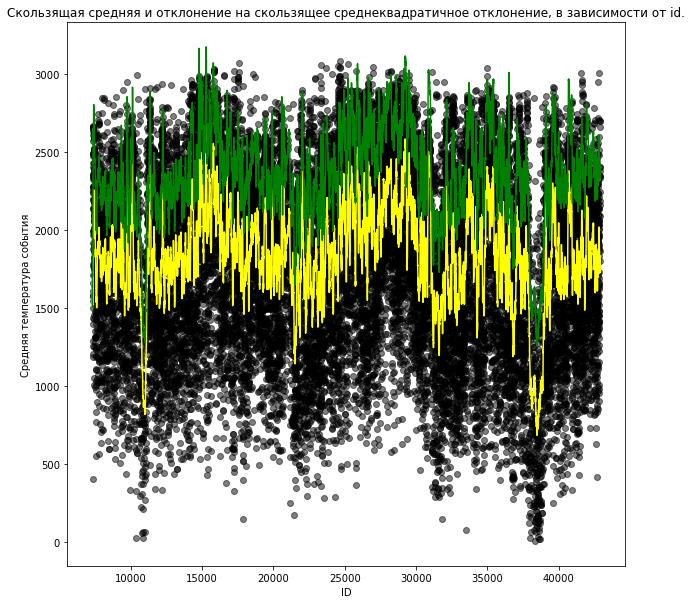

In [15]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot(111)
plot.scatter(data1['id'].unique(),main_mean_list, color = 'black', alpha=0.5)
plot.plot(data1['id'].unique(), algo_set_avg, color = 'yellow')
plot.plot(data1['id'].unique(), border, color = 'green')
plot.set_xlabel('ID')
plot.set_ylabel('Средняя температура события')
plot.set_title("Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.")

In [16]:
data_cluster = clusters[2]

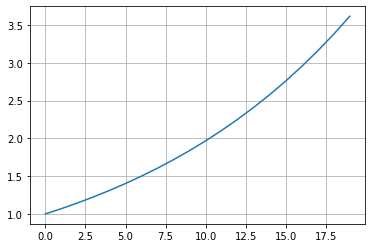

In [17]:
x = np.array(range(20))
y = np.array([pow(1.07, xi) for xi in x])
plt.plot(x,y)
plt.grid()

Text(0.5, 1.0, 'Зависимость температуры объекта от времени')

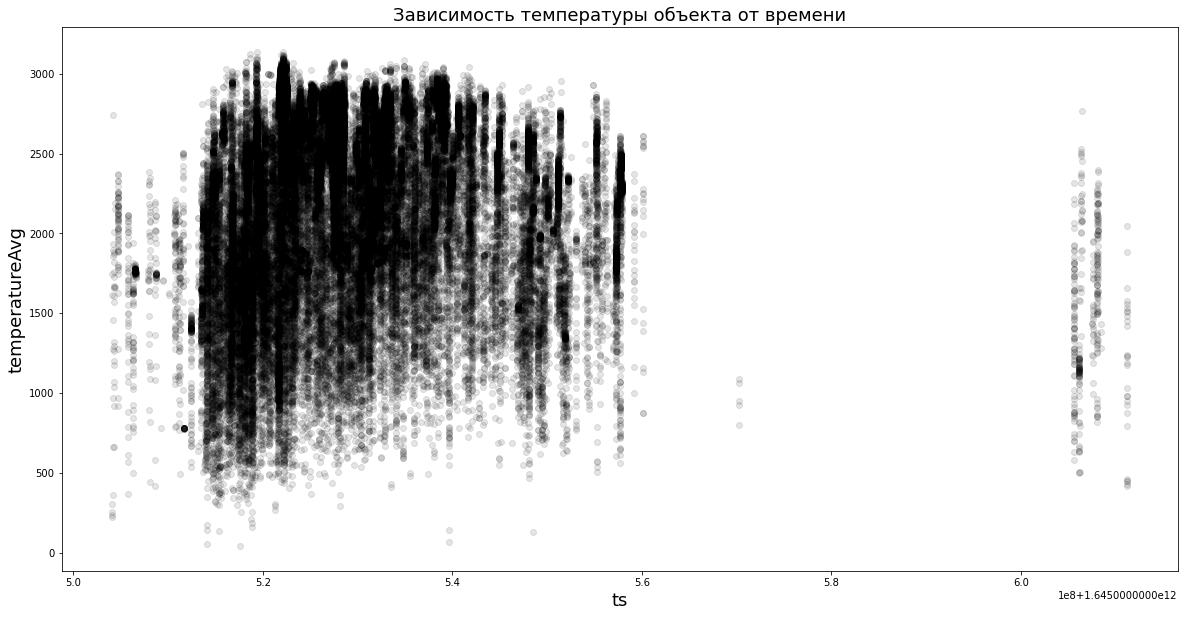

In [18]:
fig = plt.figure(figsize=(20,10))
plot = fig.add_subplot(111)
plot.scatter(data_cluster['ts'],data_cluster['temperatureAvg'], color = 'black', alpha=0.1)
plot.set_xlabel('ts', fontsize = 18)
plot.set_ylabel('temperatureAvg', fontsize = 18)
plot.set_title("Зависимость температуры объекта от времени",fontsize = 18)